In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
import os

def read_csv_files(directory_path):
    # Initialize an empty list to hold the DataFrames
    data_frames = []
    
    # Iterate over all the files in the directory
    for filename in os.listdir(directory_path):
        # Check if the file is a CSV file
        if filename.endswith(".csv"):
            file_path = os.path.join(directory_path, filename)
            person_name = filename.split('_deepfake')[0]
            # Read the CSV file and grab the first `max_rows` rows
            df = pd.read_csv(file_path)
            df['person'] = person_name
            # Append the DataFrame to the list
            data_frames.append(df)
    
    # Concatenate all the DataFrames in the list into a single DataFrame
    combined_df = pd.concat(data_frames, ignore_index=True)
    
    return combined_df

current_dir = os.path.dirname(os.getcwd())
directory_path = os.path.join(current_dir, "cis_663_summer_24/Data/voice_recognition")
combined_df = read_csv_files(directory_path)

combined_df.size

315606

In [57]:
bona_fide_df = combined_df[combined_df['label'] == 'bona-fide']
spoof_df = combined_df[combined_df['label'] == 'spoof']

# Verify that no rows in 'bona_fide_df' have the label 'spoof'
assert bona_fide_df['label'].eq('spoof').sum() == 0, "There are 'spoof' labels in 'bona_fide_df'"

# Verify that no rows in 'spoof_df' have the label 'bona-fide'
assert spoof_df['label'].eq('bona-fide').sum() == 0, "There are 'bona-fide' labels in 'spoof_df'"


In [64]:
def balance_data_by_person(data):
    # Get the minimum number of rows available for any person
    min_rows = data['person'].value_counts().min()
    
    # Sample the minimum number of rows for each person
    balanced_data = data.groupby('person').apply(lambda x: x.sample(min_rows)).reset_index(drop=True)
    
    return balanced_data

filtered_data = combined_df.copy()  # CHOOSE CLASSIFICATION DATA, if you want to classify deepfakes, use combined_df.copy()
filtered_data.reset_index(drop=True, inplace=True)
identification_data = balance_data_by_person(filtered_data)

# Split the data into features and labels
X = identification_data.drop(columns=['label', 'person'])
y = identification_data['label']  # CHOOSE CLASSIFICATION DATA, if you want to classify deepfakes, use 'label'

identification_data.head()

/var/folders/kp/ppx0111165b_t2bg2npfpzxr0000gn/T/ipykernel_28603/2256544697.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data.groupby('person').apply(lambda x: x.sample(min_rows)).reset_index(drop=True)


,chroma,centroid,bandwidth,zcr,energy,contrast,rolloff,pitch,mfcc_1,mfcc_2,...,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label,person
0,0.270959,183.670111,82.549625,0.020525,2.840121,25.068179,249.725877,227.777957,-745.289190,68.346492,...,31.190820,18.577123,6.532596,-4.155647,-12.921039,-19.449624,-23.676692,-25.753313,spoof,alan_watts
1,0.401323,186.955064,73.878454,0.022047,27.361500,25.032396,247.725475,192.144513,-673.480624,63.291993,...,27.912409,16.079725,4.913661,-4.835871,-12.651030,-18.275701,-21.707346,-23.156728,bona-fide,alan_watts
2,0.432323,177.957750,140.379851,0.018229,0.000052,18.340554,231.026786,249.683091,-1076.941365,74.357912,...,38.617349,27.402275,16.254960,5.829435,-3.493655,-11.328898,-17.295587,-21.274764,bona-fide,alan_watts
3,0.308768,193.927955,84.033766,0.022417,1.999274,23.742204,247.209821,219.211905,-767.574153,78.154612,...,32.685089,17.936935,4.301430,-7.320115,-16.378441,-22.690406,-26.395688,-27.871564,spoof,alan_watts
4,0.402876,181.434874,106.896907,0.019997,4.112337,24.743898,236.860795,207.179160,-708.167918,50.722498,...,25.285463,16.697819,8.504663,1.211978,-4.837864,-9.480756,-12.718473,-14.684871,bona-fide,alan_watts


In [65]:
authentication_data_missing_values = identification_data.isnull().sum()

print("Columns with missing values:")
authentication_data_missing_values

Columns with missing values:


chroma       0
centroid     0
bandwidth    0
zcr          0
energy       0
contrast     0
rolloff      0
pitch        0
mfcc_1       0
mfcc_2       0
mfcc_3       0
mfcc_4       0
mfcc_5       0
mfcc_6       0
mfcc_7       0
mfcc_8       0
mfcc_9       0
mfcc_10      0
mfcc_11      0
mfcc_12      0
mfcc_13      0
label        0
person       0
dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder

# Prepare the data

# Encode categorical labels to numeric
label_encoder = LabelEncoder()
identification_data['label'] = label_encoder.fit_transform(identification_data['label'])
# identification_data['person'] = label_encoder.fit_transform(identification_data['person'])

In [71]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Below is for a combined classification experiment

In [30]:
# # Create a combined target column
# identification_data['combined_label'] = identification_data['label'] + '_' + identification_data['person']

# # Encode the combined labels to numeric
# label_encoder = LabelEncoder()
# identification_data['combined_label'] = label_encoder.fit_transform(identification_data['combined_label'])

# # Split the data into features and combined labels
# X = identification_data.drop(columns=['label', 'person', 'combined_label'])
# y = identification_data['combined_label']

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U1')) -> None

SVM Model

In [32]:
from sklearn.svm import SVC


# Create and train the SVM model
svm_classifier = SVC(kernel='rbf', probability=True)
svm_classifier.fit(X_train, y_train)
# Make predictions
y_pred = svm_classifier.predict(X_test)


Accuracy Scores and Classification Matrices


Accuracy Score:
0.9066852367688022
              precision    recall  f1-score   support

   bona-fide       0.90      0.93      0.92       779
       spoof       0.92      0.87      0.90       657

    accuracy                           0.91      1436
   macro avg       0.91      0.90      0.91      1436
weighted avg       0.91      0.91      0.91      1436



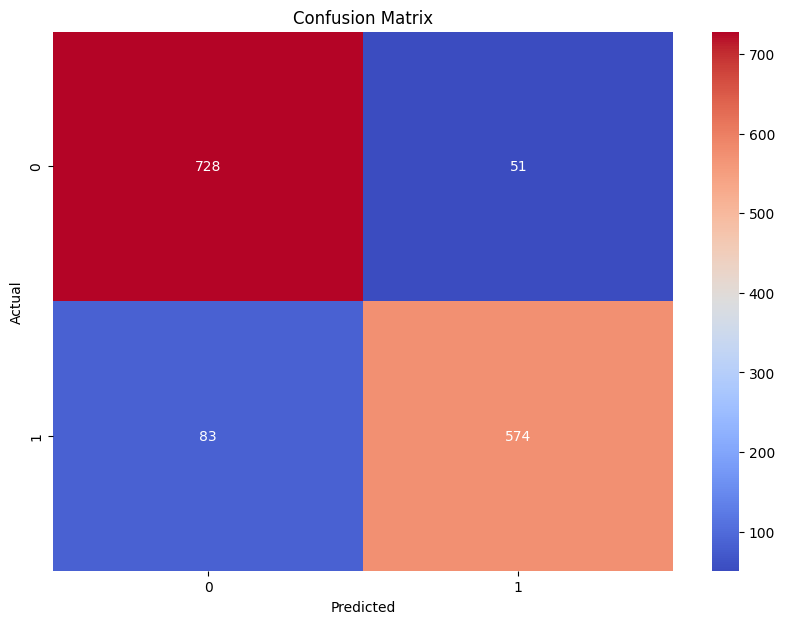

In [73]:
import seaborn as sns
from sklearn import metrics

print("\nAccuracy Score:")
print(metrics.accuracy_score(y_test, y_pred))
classification = metrics.classification_report(y_test, y_pred)
print(classification)

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)

# Get class names for the labels
# class_names = label_encoder.inverse_transform(sorted(label_encoder.transform(label_encoder.classes_)))
class_names = label_encoder.classes_

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, cmap="coolwarm", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Deep Learning Model

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

learning_rate = 0.001
epochs = 20
batch_size = 64

num_classes = len(label_encoder.classes_)


# Convert DataFrame to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create a dataset and split into train and test sets
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network model
class VoiceClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(VoiceClassifier, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.output = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x

# Instantiate the model, define the loss function and the optimizer
input_size = X.shape[1]
num_classes = len(label_encoder.classes_)
model = VoiceClassifier(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop

for epoch in range(epochs):
    model.train()
    for features, labels in train_loader:
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Convert predictions and labels to numpy arrays
y_pred = np.array(all_preds)
y_test = np.array(all_labels)

# # Print classification report
# print("Classification Report:")
# print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))



Epoch [1/20], Loss: 3.1016
Epoch [2/20], Loss: 3.0084
Epoch [3/20], Loss: 2.9871
Epoch [4/20], Loss: 2.9041
Epoch [5/20], Loss: 2.9076
Epoch [6/20], Loss: 2.9545
Epoch [7/20], Loss: 2.9276
Epoch [8/20], Loss: 2.9371
Epoch [9/20], Loss: 2.9455
Epoch [10/20], Loss: 2.9278
Epoch [11/20], Loss: 2.9384
Epoch [12/20], Loss: 2.8921
Epoch [13/20], Loss: 2.8480
Epoch [14/20], Loss: 2.8614
Epoch [15/20], Loss: 2.8583
Epoch [16/20], Loss: 2.8807
Epoch [17/20], Loss: 2.8989
Epoch [18/20], Loss: 2.7593
Epoch [19/20], Loss: 2.8544
Epoch [20/20], Loss: 2.7914


Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)